In [1]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:

import pandas as pd
df = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
df['target']=[iris['target_names'][x] for x in iris['target']]
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245022D8E08>,
      dtype=object)

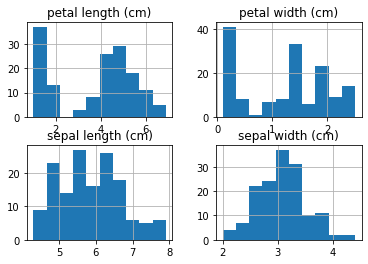

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
df.hist()

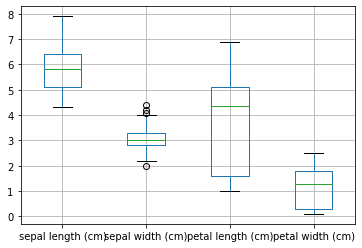

In [10]:
df.boxplot()

In [11]:
import scipy.stats as stats
for x in df.columns[:-1]:
    print(x,stats.normaltest(df[x]))

sepal length (cm) NormaltestResult(statistic=5.735584236235733, pvalue=0.05682424941067306)
sepal width (cm) NormaltestResult(statistic=3.1238322481520377, pvalue=0.2097338099298262)
petal length (cm) NormaltestResult(statistic=221.68729405585384, pvalue=7.264667501338673e-49)
petal width (cm) NormaltestResult(statistic=137.55596543193647, pvalue=1.3492785927137586e-30)


#(2번)0.05보다 크면 정규분포일 가능성이 높다. 
#(1)번은 약간 애매하다~

In [12]:
pt = df['sepal width (cm)'].mean() + stats.norm.ppf(.95) * df['sepal width (cm)'].std() #std는 표준편차
pt

3.7742695729773255

TypeError: axvspan() missing 1 required positional argument: 'xmax'

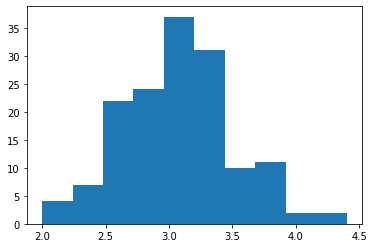

In [14]:
plt.figure()
plt.hist(df['sepal width (cm)'])
plt.axvspan(df['sepal width (cm)'])

In [15]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


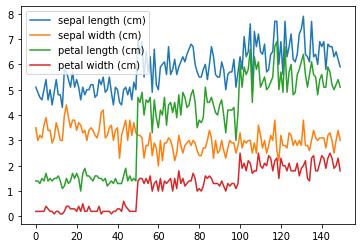

In [21]:
df.plot()

In [22]:
#t-sne?,,,,,,,,,,,,,,,,,,,,,,,,,,쩜쩜.....
#분포를 찾아내기 위한 학습모델, 30개의 샘플이 있어야한다
#분산 자유도 다 까먹음 .ㅎ.ㅎ.ㅎ
#관계성이 얼마나 강한지는 공분산을 이용해 했다. 
#X로부터 Y를 예측하려 하면 REGRESSION 
#scattergrams 점찍어서 상관관계 보는것 
#covariance x가 증가하고 y가 증가하면 pos
#covariance 채로 판단할수없다. 